In [32]:
import pandas as pd

In [44]:
data=pd.read_csv(r"C:\Users\Yaseen Khan\Documents\Data Sceince\DL - NLP GenAI\Assignments\Amazon_Reviews_train.csv",names=["number",'title',"review"])

In [34]:
data

,number,title,review
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
3599995,1,Don't do it!!,The high chair looks great when it first comes...
3599996,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599997,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599998,1,what is it saying?,not sure what this book is supposed to be. It ...


In [45]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


##### Trimming only 100000 rows out of 3600000 as my system is hanging for the entire dataset (Huge dataset)

In [80]:
df=data.iloc[:100000,:]

In [47]:
df.head()

,number,title,review
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


#### Creating the Corpus out of the data

In [81]:
corpus = '. '.join(df['review'].dropna())  #creating our corpus by joining the reviews

In [82]:
corpus[:1000]

'This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^. I\'m reading a lot of reviews saying that this is the best \'game soundtrack\' and I figured that I\'d write a review to disagree a bit. This in my opinino is Yasunori Mitsuda\'s ultimate masterpiece. The music is timeless and I\'m been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.. This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all the

##### Removing Special characters if any

In [83]:
corpus=re.sub(r'[^a-zA-Z0-9,\.\s]', '', corpus).strip()  #To remove special characters excluding (. and ,)
corpus = re.sub(r'\s+\.', '.', corpus)  #Remove spaces before periods
corpus = re.sub(r'\.{2,}', '.', corpus)  #Ensure only one period at the end of a sentence
corpus = re.sub(r'\.(?=\S)', '. ', corpus)  #Add a space after periods between sentences

In [84]:
corpus[:1000]

'This sound track was beautiful It paints the senery in your mind so well I would recomend it even to people who hate vid. game music I have played the game Chrono Cross but out of all of the games I have ever played it has the best music It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen. Im reading a lot of reviews saying that this is the best game soundtrack and I figured that Id write a review to disagree a bit. This in my opinino is Yasunori Mitsudas ultimate masterpiece. The music is timeless and Im been listening to it for years now and its beauty simply refuses to fade. The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny. This soundtrack is my favorite music of all time, hands down. The intense sadness of Prisoners of Fate which means all the more if youve played t

#### Sentence Tokenize

In [28]:
from nltk import sent_tokenize

In [85]:
Sent_token = sent_tokenize(corpus)

In [86]:
Sent_token

['This sound track was beautiful It paints the senery in your mind so well I would recomend it even to people who hate vid.',
 'game music I have played the game Chrono Cross but out of all of the games I have ever played it has the best music It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras.',
 'It would impress anyone who cares to listen.',
 'Im reading a lot of reviews saying that this is the best game soundtrack and I figured that Id write a review to disagree a bit.',
 'This in my opinino is Yasunori Mitsudas ultimate masterpiece.',
 'The music is timeless and Im been listening to it for years now and its beauty simply refuses to fade.',
 'The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.',
 'This soundtrack is my favorite music of all time, hands down.',
 'The intense sadness of Prisoners of Fate which mea

#### Word Tokenizer

In [79]:
from gensim.utils import simple_preprocess

In [90]:
all_words=[]
for i in Sent_token:
    all_words.append(simple_preprocess(i))

In [92]:
all_words[:5]

[['this',
  'sound',
  'track',
  'was',
  'beautiful',
  'it',
  'paints',
  'the',
  'senery',
  'in',
  'your',
  'mind',
  'so',
  'well',
  'would',
  'recomend',
  'it',
  'even',
  'to',
  'people',
  'who',
  'hate',
  'vid'],
 ['game',
  'music',
  'have',
  'played',
  'the',
  'game',
  'chrono',
  'cross',
  'but',
  'out',
  'of',
  'all',
  'of',
  'the',
  'games',
  'have',
  'ever',
  'played',
  'it',
  'has',
  'the',
  'best',
  'music',
  'it',
  'backs',
  'away',
  'from',
  'crude',
  'keyboarding',
  'and',
  'takes',
  'fresher',
  'step',
  'with',
  'grate',
  'guitars',
  'and',
  'soulful',
  'orchestras'],
 ['it', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen'],
 ['im',
  'reading',
  'lot',
  'of',
  'reviews',
  'saying',
  'that',
  'this',
  'is',
  'the',
  'best',
  'game',
  'soundtrack',
  'and',
  'figured',
  'that',
  'id',
  'write',
  'review',
  'to',
  'disagree',
  'bit'],
 ['this',
  'in',
  'my',
  'opinino',
  'is',
  'yas

##### Removing Stopwords

In [131]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words("english"))

In [102]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [137]:
print(all_words[:2])

[['this', 'sound', 'track', 'was', 'beautiful', 'it', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid'], ['game', 'music', 'have', 'played', 'the', 'game', 'chrono', 'cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', 'it', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras']]


In [133]:
#Function to remove Stopwords
def remove_stopwords(text):
    new_text=[]
    for word in text:
        if word not in stopwords:
            new_text.append(word.strip())
        else:
            pass
    return new_text

In [138]:
#Calling the function to remove stops words
words=[]
for swords in all_words:
    words.append(remove_stopwords(swords))

In [140]:
print(words[:2])

[['sound', 'track', 'beautiful', 'paints', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid'], ['game', 'music', 'played', 'game', 'chrono', 'cross', 'games', 'ever', 'played', 'best', 'music', 'backs', 'away', 'crude', 'keyboarding', 'takes', 'fresher', 'step', 'grate', 'guitars', 'soulful', 'orchestras']]


#### Creating the Custome Word2Vec model

In [238]:
import gensim
custom_model=gensim.models.Word2Vec(window=20,min_count=6,vector_size=250)  #creating model object with required parameters

In [246]:
custom_model=gensim.models.Word2Vec(window=20,min_count=6,vector_size=250,sg=1)

In [247]:
custom_model.build_vocab(words)  #Building Vocabulary and loading the dataset

In [248]:
custom_model.corpus_count  #Number of sentence in the corpus

494461

In [249]:
custom_model.epochs  #Number of Ecphocs on which our NN will train

5

In [250]:
custom_model.corpus_total_words   #Total words in our corpus

3803675

In [251]:
custom_model.min_count   #Sentence below this much words will be ingnored

6

In [252]:
custom_model.train(words,total_examples=custom_model.corpus_count, epochs=5)  #Training our custom model

(17390008, 19018375)

In [253]:
custom_model.wv.similarity("good", "bad")

0.5095246

In [ ]:
#Model is performing much better in Skipgram campare to CBOW and I was getting 0.624566 value while using CBOW

In [254]:
custom_model.wv["better"].shape

(250,)

In [255]:
#Checking vector count
custom_model.wv["excellent"]

array([ 0.38735613, -0.30994084, -0.01071681, -0.3310429 , -0.30384848,
        0.15639722,  0.20728886,  0.27947026,  0.1148459 ,  0.14544153,
        0.06838704, -0.1089067 ,  0.11057479, -0.15184388, -0.1952356 ,
        0.00329888, -0.0308364 , -0.00935772, -0.13712221,  0.23586725,
        0.13757938, -0.26185516,  0.06160014,  0.1696411 , -0.25288606,
        0.21828917,  0.10274084,  0.00065656, -0.3286248 , -0.21874264,
       -0.21145612,  0.05782719, -0.11932296,  0.2661609 ,  0.00698628,
       -0.2910825 ,  0.1520877 ,  0.14144659, -0.30389115, -0.1784999 ,
        0.21841116,  0.14882146, -0.05124371,  0.05127208,  0.0458833 ,
       -0.12213972,  0.1879009 ,  0.0028366 , -0.05477059,  0.23544218,
       -0.19877253, -0.24260443,  0.3805899 , -0.06340658,  0.08820023,
       -0.13680218, -0.19789065,  0.16757125, -0.40879416, -0.00379479,
       -0.00823364, -0.14685051,  0.24138838, -0.03250899,  0.02060601,
        0.07410947,  0.23598194, -0.1107132 ,  0.13294597, -0.09

In [256]:
#Checking similarities between the words
custom_model.wv.most_similar("excellent")

[('great', 0.6199621558189392),
 ('terrific', 0.6035700440406799),
 ('exceptional', 0.5933045148849487),
 ('fantastic', 0.5822237133979797),
 ('unbeatable', 0.5797416567802429),
 ('good', 0.5766756534576416),
 ('excellant', 0.5711928009986877),
 ('wonderful', 0.5697939395904541),
 ('excelent', 0.5639280676841736),
 ('outstanding', 0.559520959854126)]

In [257]:
custom_model.wv.most_similar("product")

[('item', 0.6993104219436646),
 ('products', 0.6467852592468262),
 ('plano', 0.6256691217422485),
 ('manufacturer', 0.6230894923210144),
 ('powerpack', 0.6229686737060547),
 ('vender', 0.6178304553031921),
 ('xantrex', 0.6109983325004578),
 ('macally', 0.6099713444709778),
 ('merchandise', 0.6074156761169434),
 ('wahl', 0.607117235660553)]

In [258]:
custom_model.wv.most_similar("happy")

[('satisfied', 0.6092019081115723),
 ('unhappy', 0.5912299752235413),
 ('camper', 0.5666472911834717),
 ('pleased', 0.5649409890174866),
 ('treacle', 0.5311461091041565),
 ('pewter', 0.5141870975494385),
 ('dinnerware', 0.5134946703910828),
 ('iam', 0.508039653301239),
 ('previewed', 0.5009875297546387),
 ('glad', 0.4995478093624115)]

In [261]:
custom_model.wv.doesnt_match(["happy", "good","satisfied","bad"])

'bad'

As we can in the above example "happy", "good","satisfied" comes with simiar meaning whereas "bad" comes with oppsosite meaning.
This means that our model is working better.

###### Convert our model in Vectors for dimensionality reduction

In [263]:
word_vectors = custom_model.wv   #Extracts the trained word vectors and associated vocabulary from the custom_model

In [264]:
vocab = list(word_vectors.index_to_key) #The index_to_key property contains the list of words (vocabulary) in the order of their indices in the embedding space.
#Converts the vocabulary (list of words) into a Python list and assigns it to the variable vocab.

In [265]:
vectors = word_vectors[vocab] #Retrieves the word vectors for all the words in vocab.
#The result is a matrix where each row corresponds to the vector representation of a word in the vocabulary.

In [266]:
vectors

array([[ 0.33289027, -0.10205277,  0.09710523, ...,  0.06199698,
        -0.15948403, -0.04051875],
       [ 0.27518272,  0.06731848, -0.15841433, ...,  0.00852705,
        -0.13226694, -0.05614333],
       [ 0.16014436,  0.0624276 , -0.09719335, ..., -0.320564  ,
         0.04185737, -0.14084652],
       ...,
       [ 0.06937189,  0.05860297, -0.05895064, ..., -0.00471863,
        -0.12239429,  0.03295623],
       [ 0.1254802 ,  0.06343808, -0.08548405, ..., -0.00502818,
        -0.07219871,  0.0310825 ],
       [ 0.20193261, -0.1220669 , -0.00673551, ..., -0.07432092,
        -0.04679795, -0.06022185]], dtype=float32)

In [267]:
vectors.shape

(26735, 250)

#### Dimensionality reduction using PCA

In [268]:
from sklearn.decomposition import PCA

In [269]:
pca=PCA(n_components=2)  #creating object of PCA with 2 pc's

In [270]:
pca.fit(vectors)
reduced_data=pca.transform(vectors)  #fit_transform the model

In [272]:
print(reduced_data)

[[-0.24405658 -0.7932384 ]
 [ 0.29430282  0.22921509]
 [ 0.13806237  0.47869956]
 ...
 [-0.58504814 -0.32041243]
 [-0.3313911  -0.4402289 ]
 [ 0.7303897  -0.11835161]]


In [273]:
reduced_data.shape

(26735, 2)

We can see that our dimesionality has been reduced to 2 dimension from 250

##### Lets plot the data with 2d plot

In [274]:
import matplotlib.pyplot as plt

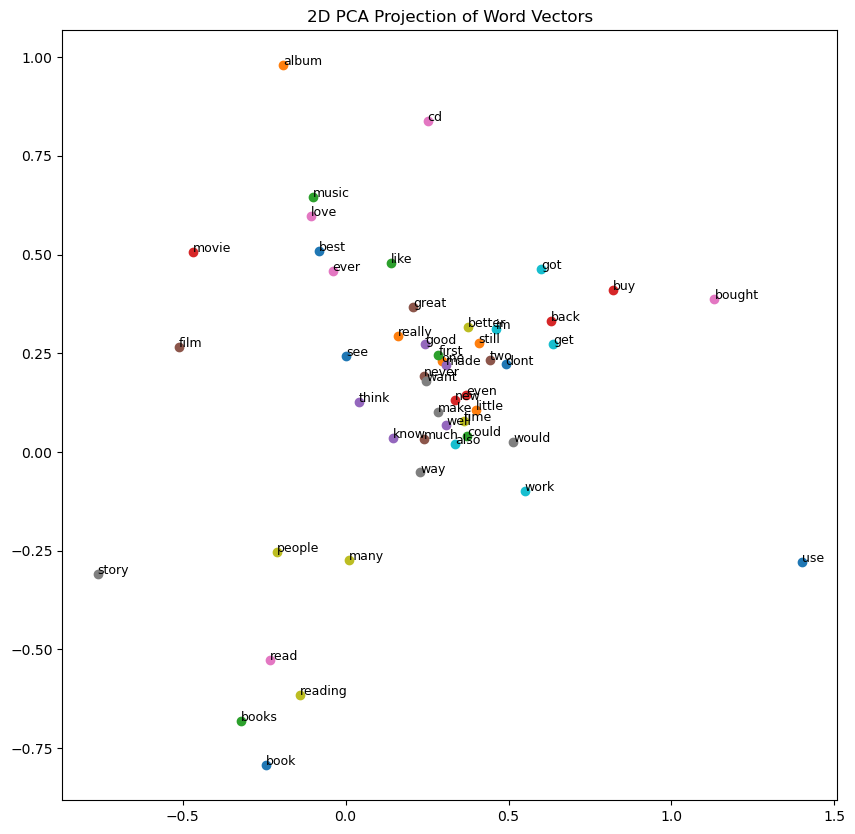

In [275]:
plt.figure(figsize=(10, 10))
for i, word in enumerate(vocab[:50]):  # Visualize only the first 50 words for clarity
    plt.scatter(reduced_data[i, 0], reduced_data[i, 1])
    plt.annotate(word, xy=(reduced_data[i, 0], reduced_data[i, 1]), fontsize=9)
plt.title("2D PCA Projection of Word Vectors")
plt.show()

### Graph Plot

In [276]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.decomposition import PCA
from gensim.models import Word2Vec

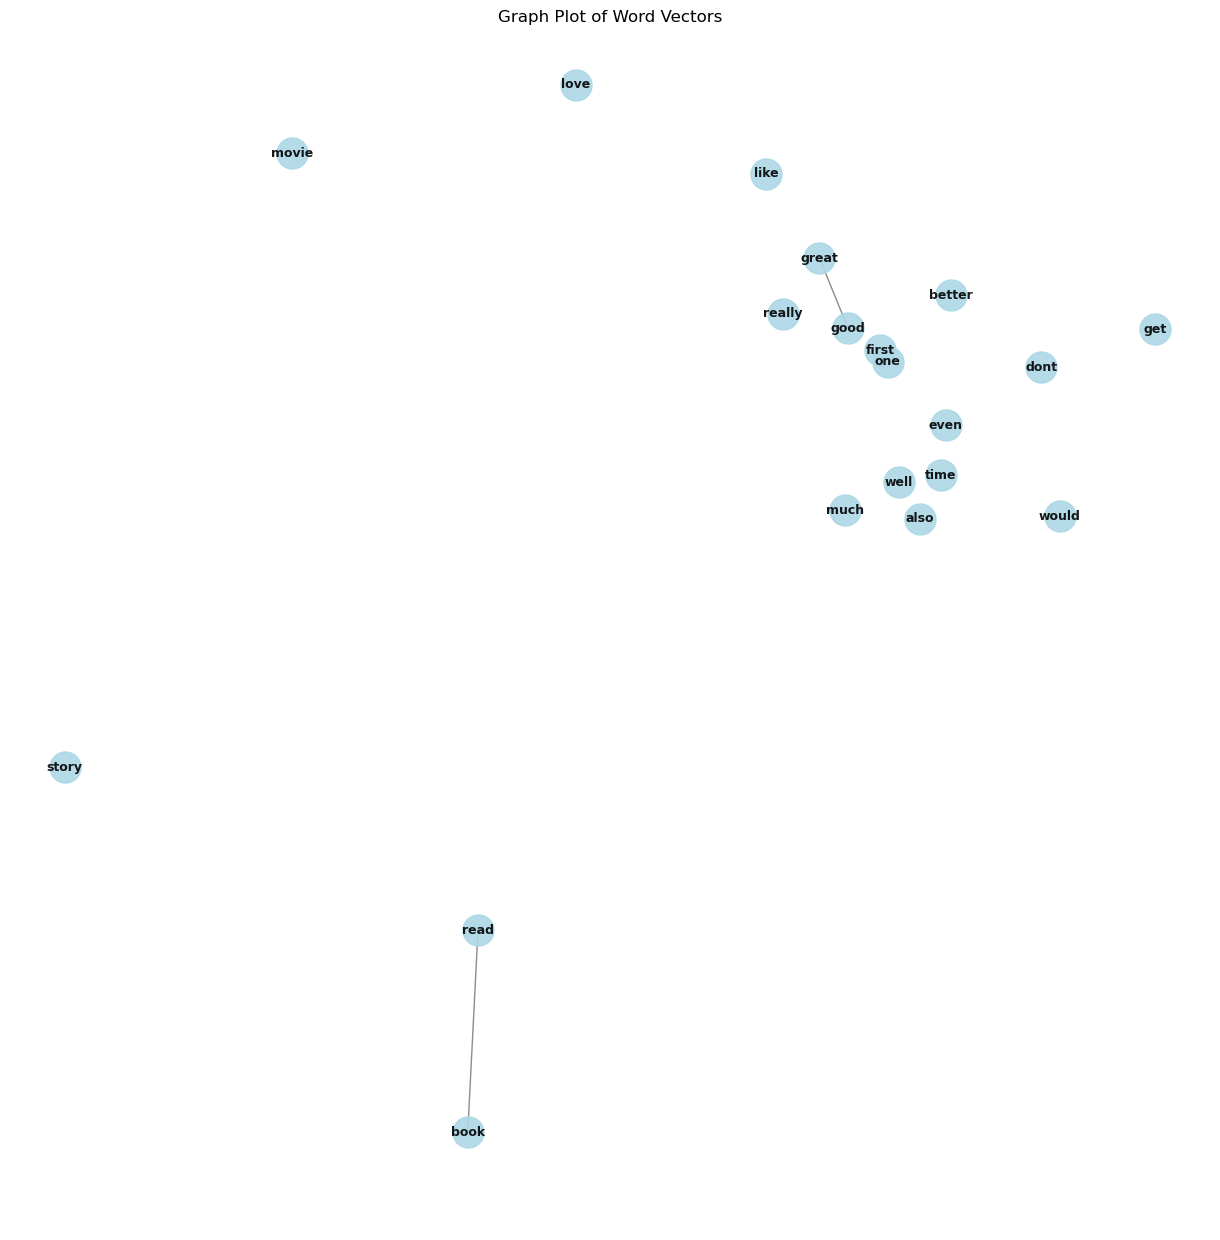

In [282]:
G = nx.Graph()

# Add nodes for each word
for i, word in enumerate(vocab[:20]):
    G.add_node(word, pos=(reduced_data[i, 0], reduced_data[i, 1]))

# Optionally, add edges based on cosine similarity
for i, word1 in enumerate(vocab[:20]):
    for j, word2 in enumerate(vocab[:20]):
        if i < j:  # Avoid duplicate edges
            similarity = custom_model.wv.similarity(word1, word2)
            if similarity > 0.5:  # Add edges only for high similarity
                G.add_edge(word1, word2, weight=similarity)

# Get positions for nodes
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(
    G, pos, with_labels=True, node_color='lightblue', edge_color='gray',
    font_size=9, font_weight='bold', node_size=500, alpha=0.9
)
plt.title("Graph Plot of Word Vectors")
plt.show()